# Airline Passenger Satisfaction

Этот набор данных содержит опрос об удовлетворенности пассажиров авиакомпаний. Нашей задачей является предсказание, доволен ли пассажир авиакомпании или нет, на основе нескольких параметров, которые являются ответами пассажира в опросе.

Содержание
Gender: Пол пассажиров (женский, мужской)

Customer type: тип клиента (постоянный клиент, нелояльный клиент).

Age: Фактический возраст пассажиров.

Type of travel: Цель полета пассажиров (личный, деловой)

Class: Класс путешествия в самолете пассажира (Business, Eco, Eco Plus)

Flight distance: расстояние полета этого путешествия.

Inflight wifi service: уровень удовлетворенности услугой Wi-Fi на борту (0: не применимо; 1-5)

Departure/Arrival time convenient: уровень удовлетворенности удобным временем отправления / прибытия

Ease of Online booking: уровень удовлетворенности онлайн-бронирования

Gate location: уровень удовлетворенности местоположением гейтов

Food and drink: уровень удовлетворенности едой и напитками

Online boarding: уровень удовлетворенности посадкой на борт

Seat comfort: уровень комфорта сиденья

Inflight entertainment: уровень удовлетворенности развлечениями в полете

On-board service: Уровень удовлетворенности бортовым обслуживанием

Leg room service: Уровень удовлетворенности местом в ногах

Baggage handling: уровень удовлетворенности обработкой багажа

Check-in service: уровень удовлетворенности службой регистрации

Inflight service: уровень удовлетворенности обслуживанием в полете

Cleanliness: уровень удовлетворенности чистотой

Departure Delay in Minutes: задержка в минутах при отправлении

Arrival Delay in Minutes: задержка в минутах при прибытии


Целевая переменная satisfaction: уровень удовлетворенности авиакомпанией (удовлетворенность, нейтральность или неудовлетворенность).

## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
data = pd.concat([pd.read_csv("train.csv", index_col=0), pd.read_csv("test.csv", index_col=0)])

In [3]:
data.shape

(129880, 24)

In [4]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [7]:
data[['Gender', 'Customer Type', 'Type of Travel', 'Class']] = data[['Gender', 'Customer Type', 'Type of Travel', 'Class']].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   Gender                             129880 non-null  category
 2   Customer Type                      129880 non-null  category
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  category
 5   Class                              129880 non-null  category
 6   Flight Distance                    129880 non-null  int64   
 7   Inflight wifi service              129880 non-null  int64   
 8   Departure/Arrival time convenient  129880 non-null  int64   
 9   Ease of Online booking             129880 non-null  int64   
 10  Gate location                      129880 non-null  int64   
 11  Food and drink             

In [9]:
data=data.drop(['id'], axis=1)
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

## Визуализация

In [10]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [11]:
data.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,65899,106100,89693,62160


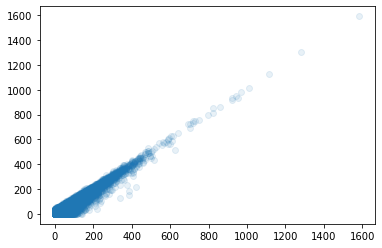

In [12]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha=0.1)
pass

In [13]:
data.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248,0.134091
Flight Distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935,0.298085
Inflight wifi service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749,0.283460
Departure/Arrival time convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942,-0.054270
Ease of Online booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033,0.168877
Gate location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658,-0.002793
Food and drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715,0.211340
Online boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730,0.501749
Seat comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521,0.348829
Inflight entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012,-0.030230,0.398234


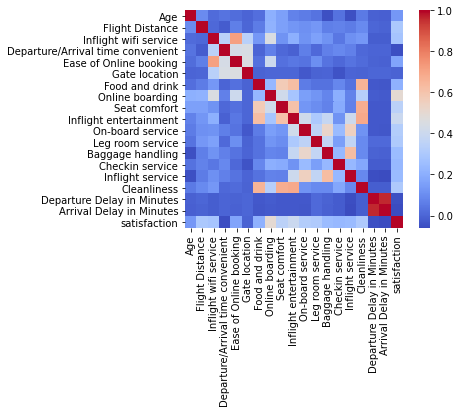

In [14]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

Видно, что сильной корреляции количественных признаков с целевой переменной не наблюдается. Наиболее связаны с удволетворением оценки за различные сервисы во время полета. Между тем, время задержки отправления и прибытия очень сильно коррелируют между собой.

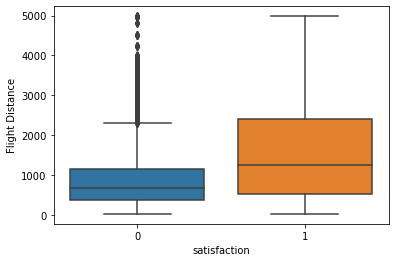

In [15]:
sns.boxplot(x="satisfaction", y="Flight Distance", data=data)
pass

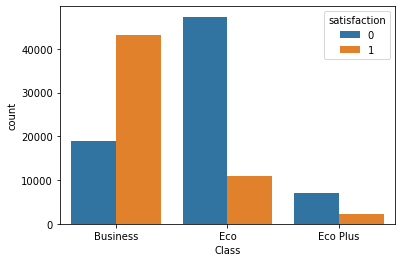

In [16]:
sns.countplot(x='Class', order=data['Class'].value_counts().index, hue='satisfaction', data=data)
pass

Из диаграммы выше видно, что пользователей бизнес-класса в 2 раза больше удволетворенных, чем нет, а вот в эконом-классах наблюдается существенное преобладание недовольных

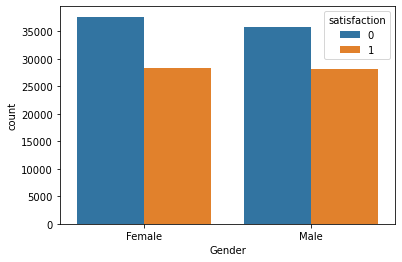

In [17]:
sns.countplot(x='Gender', order=data['Gender'].value_counts().index, hue='satisfaction', data=data)
pass

Соотношение удволетворенных полетом мужчин и женщин практически одинаковое

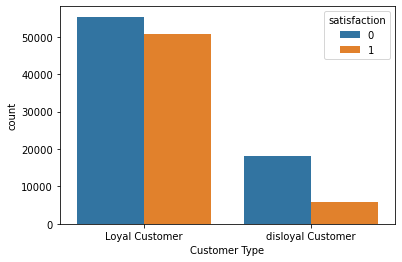

In [18]:
sns.countplot(x='Customer Type', order=data['Customer Type'].value_counts().index, hue='satisfaction', data=data)
pass

Соотношение удволетворенных полетом среди лояльных ровное, с небольшим преобладанием недовольных. А вот среди придирчивых неудволетворенных гораздо больше.

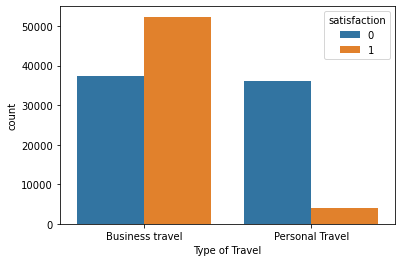

In [19]:
sns.countplot(x='Type of Travel', order=data['Type of Travel'].value_counts().index, hue='satisfaction', data=data)
pass

Судя по всему, люди в полетах по работе не так сильно заостряют внимание на различные параметры, в отличии от полетов с личными целями.

## Пропущенные значения

In [20]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [21]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), axis=0 , inplace=True)

In [22]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Категориальные признаки

In [23]:
data['Customer Type'] = pd.factorize(data['Customer Type'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Type of Travel'] = pd.factorize(data['Type of Travel'])[0]

In [24]:
Building_dummies = pd.get_dummies(data['Class'])

In [25]:
Building_dummies.head()

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
data = pd.concat((data, Building_dummies), axis=1)
data = data.drop(['Class'], axis=1)

In [27]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,0,1,25,1,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,1,0,26,1,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,1,0,25,1,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,0,0,61,1,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0


## Нормализация

In [28]:
data_norm = (data - data.mean(axis = 0))/data.std(axis = 0)

In [29]:
data_norm.describe()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,...,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,6.856576e-16,9.267046e-17,-8.443226e-17,8.642626e-16,1.721803e-16,1.031809e-15,-2.425723e-15,-6.873458e-16,1.098752e-16,6.977600e-16,...,-7.491526e-17,-1.598169e-15,7.202055e-16,9.102205e-16,-1.756533e-15,-2.045484e-16,-2.941629e-16,5.481192e-17,3.794590e-16,3.996299e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.014874e+00,-4.734200e-01,-2.144797e+00,-1.493946e+00,-1.162277e+00,-2.052669e+00,-2.002696e+00,-1.966753e+00,-2.328415e+00,-2.409726e+00,...,-2.230559e+00,-2.611203e+00,-3.095342e+00,-2.501614e+00,-3.864796e-01,-3.916422e-01,-8.764837e-01,-9.580658e-01,-9.026047e-01,-2.794979e-01
25%,-1.014874e+00,-4.734200e-01,-8.219896e-01,-1.493946e+00,-7.782991e-01,-5.481635e-01,-6.927167e-01,-5.399545e-01,-7.641062e-01,-9.058904e-01,...,-5.356789e-01,-2.418819e-01,-5.457718e-01,-9.791758e-01,-3.864796e-01,-3.916422e-01,-8.764837e-01,-9.580658e-01,-9.026047e-01,-2.794979e-01
50%,9.853362e-01,-4.734200e-01,3.783516e-02,6.693632e-01,-3.472009e-01,2.040894e-01,-3.772696e-02,1.734448e-01,1.804833e-02,-1.539729e-01,...,3.117611e-01,-2.418819e-01,3.040848e-01,-2.179567e-01,-3.864796e-01,-3.916422e-01,-8.764837e-01,-9.580658e-01,-9.026047e-01,-2.794979e-01
75%,9.853362e-01,-4.734200e-01,7.653792e-01,6.693632e-01,5.550977e-01,9.563424e-01,6.172628e-01,8.868440e-01,8.002029e-01,5.979446e-01,...,1.159201e+00,5.478919e-01,1.153941e+00,5.432624e-01,-7.128007e-02,-5.324464e-02,1.140914e+00,1.043762e+00,1.107896e+00,-2.794979e-01
max,9.853362e-01,2.112273e+00,3.014152e+00,6.693632e-01,3.802370e+00,1.708595e+00,1.272253e+00,1.600243e+00,1.582357e+00,1.349862e+00,...,1.159201e+00,1.337666e+00,1.153941e+00,1.304481e+00,4.142999e+01,4.084080e+01,1.140914e+00,1.043762e+00,1.107896e+00,3.577817e+00


## Разбиение данных

In [30]:
from sklearn.model_selection import train_test_split

X = data_norm.drop(['satisfaction'], axis=1)
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(103904, 25976)

## kNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [191]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [202]:
y_pred = knn.predict(X_test)

In [203]:
y_pred_train=knn.predict(X_train)

In [204]:
precision = precision_score(y_train, y_pred_train, average='macro')
recall    = recall_score(y_train, y_pred_train, average='macro')
f1        = f1_score(y_train, y_pred_train, average='macro')
acc       = accuracy_score(y_train, y_pred_train)

print("Train:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Train:
Precision 0.9512803489354852
Recall 0.9441853040067063
F1-score 0.9471086227636425
Accuracy 0.9483946720049277



In [205]:
precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')
acc       = accuracy_score(y_test, y_pred)

print("Test:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Test:
Precision 0.9337142578888014
Recall 0.925452064335357
F1-score 0.9287268253111303
Accuracy 0.9305512781028642



In [206]:
confusion_matrix(y_pred, y_test)

array([[14164,  1282],
       [  522, 10008]], dtype=int64)

Таким образом, данный классификатор с дефолтными параметрами определяет удволетворенность пассажира с точностью до 93%.

In [195]:
knn2 = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree') #поиграемся с параметрами
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, weights='distance')

In [207]:
y_pred = knn2.predict(X_test)

In [208]:
y_pred_train = knn2.predict(X_train)

In [209]:
precision = precision_score(y_train, y_pred_train, average='macro')
recall    = recall_score(y_train, y_pred_train, average='macro')
f1        = f1_score(y_train, y_pred_train, average='macro')
acc       = accuracy_score(y_train, y_pred_train)

print("Train:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Train:
Precision 1.0
Recall 1.0
F1-score 1.0
Accuracy 1.0



In [210]:
precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')
acc       = accuracy_score(y_test, y_pred)

print("Test:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Test:
Precision 0.9341028252329415
Recall 0.9250119749146195
F1-score 0.9285509625378384
Accuracy 0.9304357868801971



Видно, что на обучающей выборке модель показывает идеальный результат, но это больше похоже на переобучение, так как на тестовой выборке улучшения не происходит

Для поиска оптимальных параметров модели можно воспользоваться кросс-валидацией

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [199]:
knn_cv = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)
grid = GridSearchCV(knn_cv, param_grid = {'n_neighbors': [1, 3, 5,7]}, cv=skf, scoring='accuracy', n_jobs=-1)

In [200]:
%%time
grid.fit(X_train, y_train)

Wall time: 12min 33s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [211]:
grid.best_score_

0.927394537349236

In [212]:
grid.best_params_

{'n_neighbors': 7}

Кросс-валидация по числу соседей показала, что оптимальным будет число 7

In [213]:
knn_cv = KNeighborsClassifier(n_neighbors=7)
knn_cv.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [214]:
y_pred = knn_cv.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')
acc       = accuracy_score(y_test, y_pred)

print("Test:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Test:
Precision 0.9342959214378281
Recall 0.925148159035551
F1-score 0.928705458499351
Accuracy 0.9305897751770865



Как видим, существенного увеличения точности так и не произошло

## Random Forest

В качестве примера еще одного классификатора можно рассмотреть Random Forest

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [217]:
y_pred_train = rf.predict(X_train)

precision = precision_score(y_train, y_pred_train, average='macro')
recall    = recall_score(y_train, y_pred_train, average='macro')
f1        = f1_score(y_train, y_pred_train, average='macro')
acc       = accuracy_score(y_train, y_pred_train)

print("Train:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Train:
Precision 1.0
Recall 1.0
F1-score 1.0
Accuracy 1.0



In [218]:
y_pred = rf.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')
acc       = accuracy_score(y_test, y_pred)

print("Test:\nPrecision {}\nRecall {}\nF1-score {}\nAccuracy {}\n".format(precision, recall, f1, acc))

Test:
Precision 0.9638699864135499
Recall 0.9604413535567758
F1-score 0.9619917263539125
Accuracy 0.9627733292269788



Как видно из результатов, даже на дефолтных значения случайный лес в нашем случае отработал лучше, чем метод ближайших соседей

## PCA

In [31]:
X.shape

(129880, 24)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [33]:
X_pca.shape

(129880, 2)

In [34]:
print("Главные компоненты (по строкам):")
print(pca.components_)
print("Дисперсии по главным компонентам:")
print(pca.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca.explained_variance_))

Главные компоненты (по строкам):
[[ 0.00442669  0.08234276 -0.08940641 -0.18344622 -0.18955558 -0.1837492
  -0.04594794 -0.1424476  -0.04273267 -0.24777737 -0.28800284 -0.31106944
  -0.36427812 -0.24969766 -0.21292733 -0.22301354 -0.16417063 -0.22442151
  -0.29667332  0.02833323  0.03121921 -0.29340568  0.26416472  0.05854026]
 [ 0.00103294  0.07488621  0.00262272  0.18783437  0.13294751 -0.45527711
  -0.46393772 -0.48472826 -0.40781847  0.00288077 -0.14112451  0.03204578
   0.03304082  0.04062548  0.02334854  0.0242906   0.02030737  0.0261202
   0.01905093  0.00517478  0.00519473  0.22152695 -0.20148689 -0.04029006]]
Дисперсии по главным компонентам:
[4.34698462 2.4171339 ]
Среднеквадратические отклонения:
[2.08494235 1.55471345]


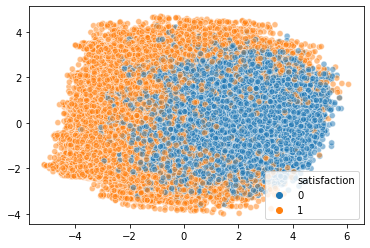

In [40]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, alpha=0.5)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 35)

In [36]:
from sklearn.svm import SVC

In [37]:
%%time
svm = SVC()

svm.fit(X_train, y_train)

Wall time: 3min 13s


SVC()

In [38]:
print("Train accuracy: {}.\n Test accuracy: {}".format(svm.score(X_train, y_train), svm.score(X_test, y_test)))

Train accuracy: 0.8387068832768709.
 Test accuracy: 0.8426624576532183


In [41]:
%%time
results = pd.DataFrame(columns = ["Components", "Train_acc", "Test_acc"])

for n_comp in range(1, 24):
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 35)
    svm = SVC()
    svm.fit(X_train, y_train)
    comp_result = {"Components": n_comp, "Train_acc" : svm.score(X_train, y_train), "Test_acc" : svm.score(X_test, y_test)}
    results = results.append(comp_result, ignore_index=True)

Wall time: 1h 38min 42s


In [42]:
results

,Components,Train_acc,Test_acc
0,1.0,0.817822,0.822836
1,2.0,0.838717,0.842701
2,3.0,0.851267,0.853788
3,4.0,0.870996,0.873460
4,5.0,0.871824,0.873152
5,6.0,0.901852,0.903103
6,7.0,0.907222,0.907838
7,8.0,0.910581,0.910302
8,9.0,0.920619,0.921543
9,10.0,0.923699,0.924238


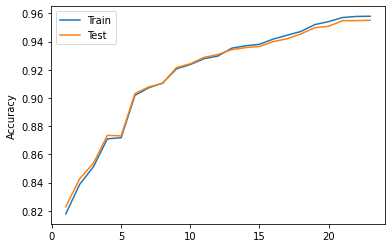

In [43]:
plt.plot(results.Components, results.Train_acc, label="Train")
plt.plot(results.Components, results.Test_acc, label = "Test")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Итог

В результате работы был рассмотрен датасет Airline Passenger Satisfaction, визуализированы данные и обработаны, а также построено и проверено несколько классификаторов для предсказания удволетворенности пассажиров. В дальнейшем, с целью улучшения качества итоговой оценки, можно сделать еще несколько различных действий, например, удалить один из преобразованных параметров Class, или использовать для предсказания только определенные столбцы, наиболее связанные с целевой переменной. Также была мысль исключить выбросы, казалось, что в Flight Distance их достаточно много, но в то же время максимальное значение из этой колонки составляет чуть меньше 5000 (подозреваю, км), что вполне нормально для перелетов. 